<a href="https://colab.research.google.com/github/luisfeliphe66/Sorteios_mega_sena/blob/main/Sorteios_mega_sena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Mega Sena**
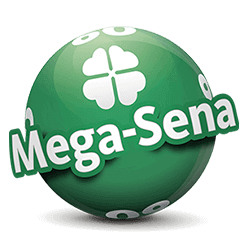

# ⭐ ***Inicio***


⚫ ***Spark*** - Instalação e configuração

In [1]:
!apt-get update -qq
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
!tar xf spark-3.1.2-bin-hadoop2.7.tgz
!pip install -q findspark

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [3]:
!pip install -q findspark

In [4]:
import findspark
!findspark.init();

/bin/bash: -c: line 1: syntax error near unexpected token `;'
/bin/bash: -c: line 1: `findspark.init();'


⚫ ***Acessando o Spark UI (Google Colab)***

In [5]:
!from pyspark.sql import SparkSession

!spark = SparkSession.builder \
    .master('local[*]') \
    .appName("Iniciando com Spark") \
    .config('spark.ui.port', '4050') \
    .getOrCreate()

/bin/bash: line 1: from: command not found
/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `spark = SparkSession.builder      .master('local[*]')      .appName("Iniciando com Spark")      .config('spark.ui.port', '4050')      .getOrCreate()'


⚫ ***Ngrok - instalação e configuração***

In [6]:
!wget -q https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [7]:
!pip install pyngrok
!from pyngrok import ngrok

/bin/bash: line 1: from: command not found


In [8]:
!ngrok authtoken "2iU4okZxuzJLCQMOE5sUdlAK29x_2JdshyZxxF2DDWoXyoEke"

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [9]:
!ngrok.connect('4050')

/bin/bash: -c: line 1: syntax error near unexpected token `'4050''
/bin/bash: -c: line 1: `ngrok.connect('4050')'


In [10]:
!curl -s http://localhost:4040/api/tunnels

# ***⏭ Execução***

⚫ ***Montando Gdrive*** :

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


⚫ ***Carregando os dados do `AIRFLOW`***

In [40]:
import zipfile

# Caminho para o arquivo ZIP que você deseja extrair
caminho_arquivo_zip = '/content/drive/MyDrive/curso-spark/MegaSena/base_mega_sena.zip'

# Diretório de destino onde deseja extrair os arquivos
diretorio_destino = '/content/drive/MyDrive/curso-spark/MegaSena/'

# Extrair os arquivos do arquivo ZIP para o diretório de destino
with zipfile.ZipFile(caminho_arquivo_zip, 'r') as zip_ref:
    zip_ref.extractall(diretorio_destino)

⚫ ***Importações e Definição da Função***

In [41]:
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt

def delete_coluna_ordem(caminho_arquivo_zip, diretorio_destino):
    # Extrair os arquivos do arquivo ZIP para o diretório de destino
    with zipfile.ZipFile(caminho_arquivo_zip, 'r') as zip_ref:
        zip_ref.extractall(diretorio_destino)

    # Encontrar o nome do arquivo extraído
    nome_arquivo_extraido = None
    for nome in zip_ref.namelist():
        if nome.endswith('.csv'):
            nome_arquivo_extraido = os.path.join(diretorio_destino, nome)
            break

    return nome_arquivo_extraido

# Chamar a função para extrair o nome do arquivo CSV
caminho_arquivo_zip = '/content/drive/MyDrive/curso-spark/MegaSena/base_mega_sena.zip'
diretorio_destino = '/content/drive/MyDrive/curso-spark/MegaSena/'
nome_arquivo_extraido = delete_coluna_ordem(caminho_arquivo_zip, diretorio_destino)

⚫ ***Gráfico de Barras com as Contagens nos Concursos***

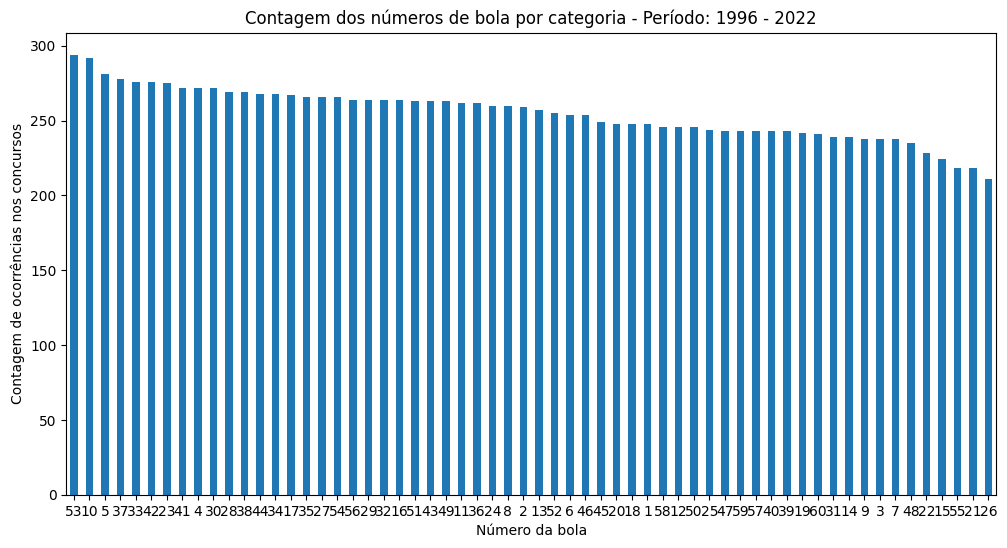

In [75]:
if nome_arquivo_extraido:
    # Carregar o DataFrame a partir do arquivo CSV extraído
    df = pd.read_csv(nome_arquivo_extraido)

    # Deleta a coluna 'ordem' se existir
    if 'ordem' in df.columns:
        df = df.drop(columns=['ordem'])

    # Contagem de ocorrências dos números de bola
    contagem_bolas = df['bola'].value_counts()

    # Gráfico de barras empilhadas
    plt.figure(figsize=(12, 6))
    contagem_bolas.plot(kind='bar', stacked=True, rot=0)
    plt.title('Contagem dos números de bola por categoria - Período: 1996 - 2022')
    plt.xlabel('Número da bola')
    plt.ylabel('Contagem de ocorrências nos concursos')
    plt.show()
else:
    print('Não foi possível encontrar um arquivo CSV dentro do ZIP.')

⚫ ***Exibi os Números da Sorte***

In [81]:
# Ordena números de bolas que mais foram sorteadas nos concursos
if nome_arquivo_extraido:
    sorted_group = contagem_bolas.sort_values(ascending=False)
    bola_1 = sorted_group[0:6].index[0]
    bola_2 = sorted_group[0:6].index[1]
    bola_3 = sorted_group[0:6].index[2]
    bola_4 = sorted_group[0:6].index[3]
    bola_5 = sorted_group[0:6].index[4]
    bola_6 = sorted_group[0:6].index[5]

    # Criar ícones de bolas
    icones = ["🎱", "🎱", "🎱", "🎱", "🎱", "🎱"]

    # Exibir os números da sorte com ícones de bolas
    mensagem = f"Seus números da sorte são: {icones[0]} {bola_1} - {icones[1]} {bola_2} - {icones[2]} {bola_3} - {icones[3]} {bola_4} - {icones[4]} {bola_5} - {icones[5]} {bola_6}"
    print(mensagem)


Seus números da sorte são: 🎱 53 - 🎱 10 - 🎱 5 - 🎱 37 - 🎱 33 - 🎱 42


⚫ ***Gráfico de Barras com os Números Mais Sorteados***

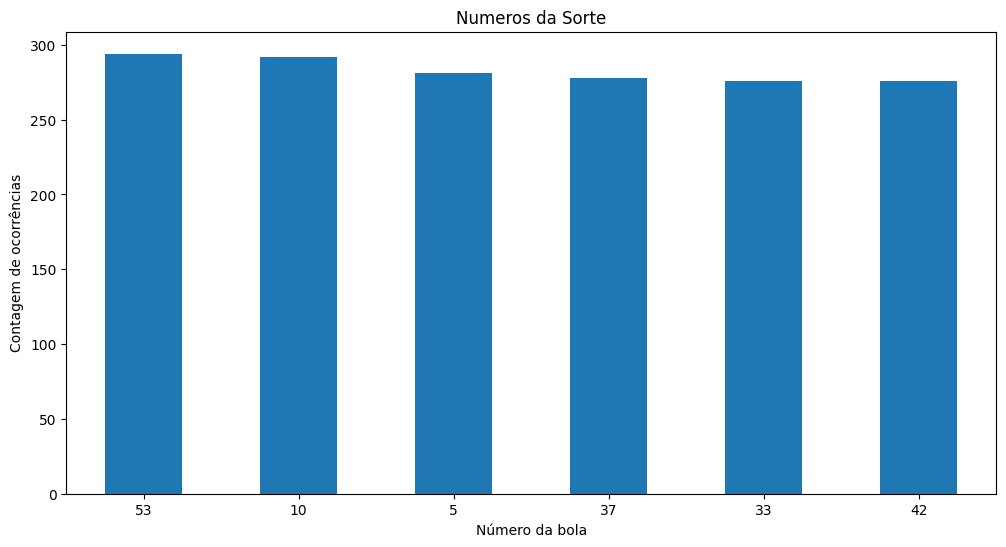

In [76]:
# Gráfico de barras com os números mais sorteados nos concursos
if nome_arquivo_extraido:
    plt.figure(figsize=(12, 6))
    ultimos_numeros = contagem_bolas.head(6)
    ultimos_numeros.plot(kind='bar', rot=0)
    plt.title('Numeros da Sorte')
    plt.xlabel('Número da bola')
    plt.ylabel('Contagem de ocorrências')
    plt.show()
else:
    print('Não foi possível encontrar um arquivo CSV dentro do ZIP.')

# ***⏹ Conclusão***

Durante este projeto, nosso objetivo foi trabalhar com dados extraídos do `SUS-Mega Sena`, carregando um arquivo CSV para análise e visualização. Para isso, utilizamos ferramentas essenciais como Pandas e Matplotlib para manipular e apresentar os dados de forma gráfica.

Além disso, exploramos a funcionalidade de compactação e extração de dados usando a biblioteca zipfile, o que foi útil para lidar com arquivos comprimidos e automatizar parte do processo de `ETL` (Extração, Transformação e Carga). Isso incluiu a criação de um pipeline com `Airflow` para agendar e executar tarefas relacionadas à extração e transformação dos dados antes de serem exportados para projetos `Spark`.

Em resumo, a capacidade de utilizar essas ferramentas e técnicas foi fundamental para analisar dados de forma eficiente e extrair insights significativos, facilitando assim a tomada de decisões informadas em diversos cenários de análise de dados.